In [1]:
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons, make_circles, make_swiss_roll
from scipy.linalg import svd
from mpl_toolkits.mplot3d import Axes3D

%matplotlib notebook


X, y = make_moons(n_samples=500, random_state=123)


def pca(X, n=3):
    print('Data shape: %s %s' % X.shape)
    zero_mean = (X - X.mean(axis=0))
    cov = np.cov(zero_mean, rowvar=False)
    print('Cov shape: %s %s' % cov.shape)
    # return cov
    _, eigen_values, eigen_vectors = svd(cov)
    print('eigen_vectors shape: %s %s' % eigen_vectors.shape)

    row_feature_vector = eigen_vectors[:n]
    print('row_feature_vector shape: %s %s' % row_feature_vector.shape)

    row_data_mean = zero_mean.T
    print('row_data_mean shape: %s %s' % row_data_mean.shape)

    final_data = row_feature_vector.dot(row_data_mean).T
    print('final_data shape: %s %s' % final_data.shape)

    s1, s2, s3, s4, s5, s6 = ['%sx%s' % i for i in (X.shape, cov.shape, eigen_vectors.shape, row_feature_vector.shape,  row_data_mean.shape,  final_data.shape)]
    print("%s -> %s -> %s -> %s -> %s -> %s" % (s1, s2, s3, s4, s5, s6))
    return final_data, eigen_vectors



C:\Users\hellpanderrr\Anaconda3\lib\importlib\_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
final_data, eigen_vectors = pca(X, n=2)

Data shape: 500 2
Cov shape: 2 2
eigen_vectors shape: 2 2
row_feature_vector shape: 2 2
row_data_mean shape: 2 500
final_data shape: 500 2
500x2 -> 2x2 -> 2x2 -> 2x2 -> 2x500 -> 500x2


<IPython.core.display.Javascript object>


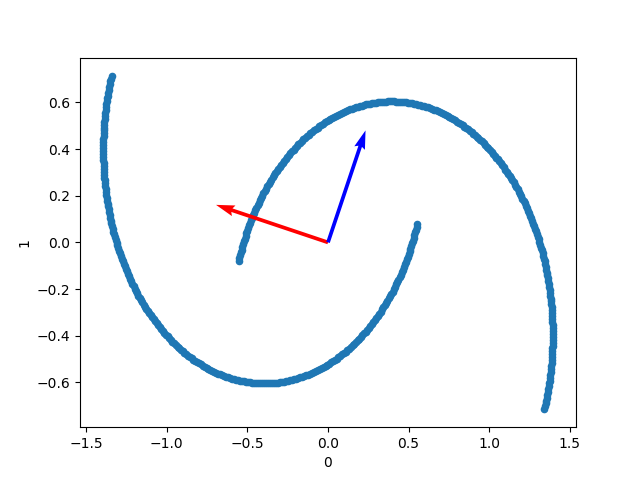

In [3]:
import matplotlib.pyplot as plt


origin = [0], [0] # origin point
pd.DataFrame(final_data).plot(kind='scatter',x=0,y=1)
plt.quiver(*origin, eigen_vectors.T[:,0]*5, eigen_vectors.T[:,1]*5, color=['r','b','g'], scale=21)


In [4]:
from numpy.linalg import norm
from scipy.spatial.distance import pdist, squareform
from numpy import tanh


def make_kernel(X, kind='rbf', degree=3, gamma=1.0, coef0=1):
    if kind == 'rbf':
        sq_dists = squareform(pdist(X, 'sqeuclidean'))
        K = np.exp(-gamma * sq_dists)
    elif kind == 'linear':
        K = X.dot(X.T)
    elif kind == 'polynomial':
        K = X.dot(X.T)
        K *= gamma
        K += coef0
        K **= degree
    elif kind == 'sigmoid':
        r = 0
        K = tanh(gamma * X.dot(X.T)+coef0)
    return K


def kernel_pca(X, n=2, kernel='rbf', degree=3, gamma=1.0, coef0=1):
    if kernel == 'rbf':
        K = make_kernel(X, kind='rbf', gamma=gamma)
    elif kernel == 'linear':
        K = make_kernel(X, kind='linear')
    elif kernel == 'polynomial':
        K = make_kernel(X, kind='polynomial', degree=degree,
                        gamma=gamma, coef0=coef0)
    elif kernel == 'sigmoid':
        K = make_kernel(X, kind='sigmoid', gamma=gamma, coef0=coef0)
    N = K.shape[0]
    one_n = np.ones((N, N)) / N
    K = K - one_n.dot(K) - K.dot(one_n) + one_n.dot(K).dot(one_n)
    _, eigen_values, eigen_vectors = svd(K)
    return eigen_vectors[:n, :].T * np.sqrt(eigen_values[:n])

transformed = kernel_pca(X, kernel='rbf', gamma=0.01)

<IPython.core.display.Javascript object>


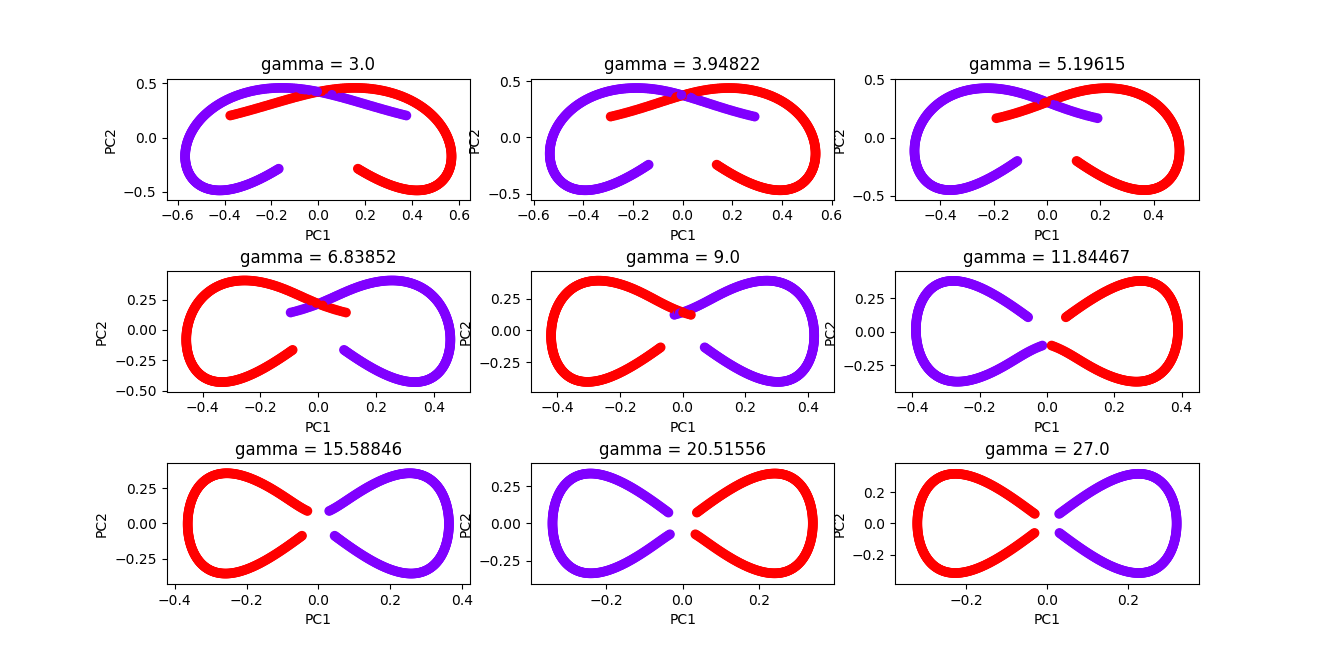

In [5]:
def plot(X, ax, title='', gamma=''):
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.rainbow)
    ax.set_title('gamma = %s' % gamma)
    ax.set_xlabel('PC1')
    ax.set_ylabel('PC2')

f, axes = plt.subplots(3, 3, sharey=False, )
plt.subplots_adjust(hspace=0.59)
gammas = np.logspace(1, 3, 9, base=3).reshape(3,3)
for n, axes in enumerate(axes):
    for k, ax in enumerate(axes):
        gamma = round(gammas[n][k],5)
        transformed = kernel_pca(X, kernel='rbf', gamma=gamma)
        plot(transformed, ax, gamma=gamma)


<IPython.core.display.Javascript object>


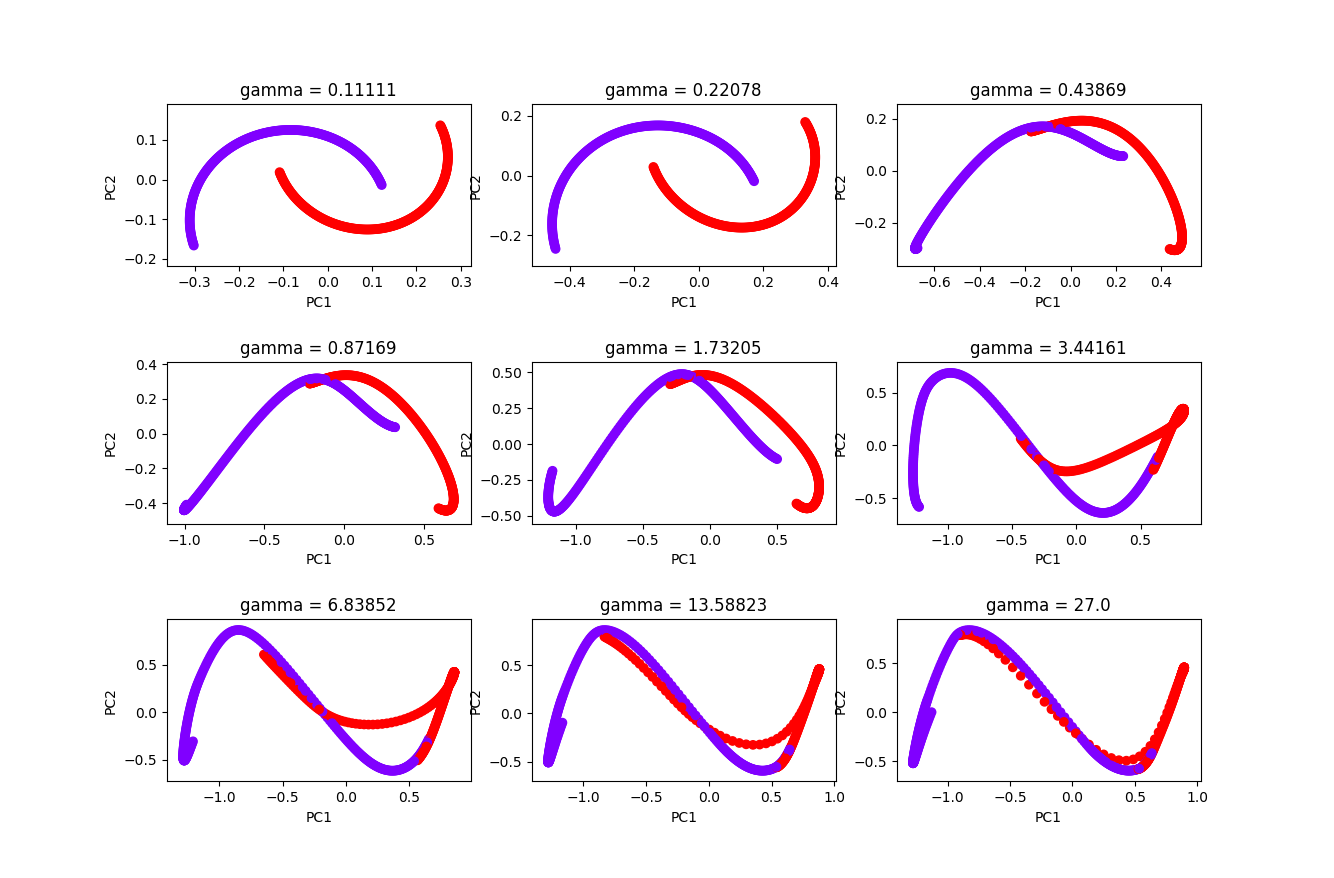

In [6]:
f, axes = plt.subplots(3, 3, sharey=False, )
plt.subplots_adjust(hspace=0.59)
gammas = np.logspace(-2, 3, 9, base=3).reshape(3,3)
for n, axes in enumerate(axes):
    for k, ax in enumerate(axes):
        gamma = round(gammas[n][k],5)
        transformed = kernel_pca(X, kernel='sigmoid', gamma=gamma)
        plot(transformed, ax, gamma=gamma)

<IPython.core.display.Javascript object>


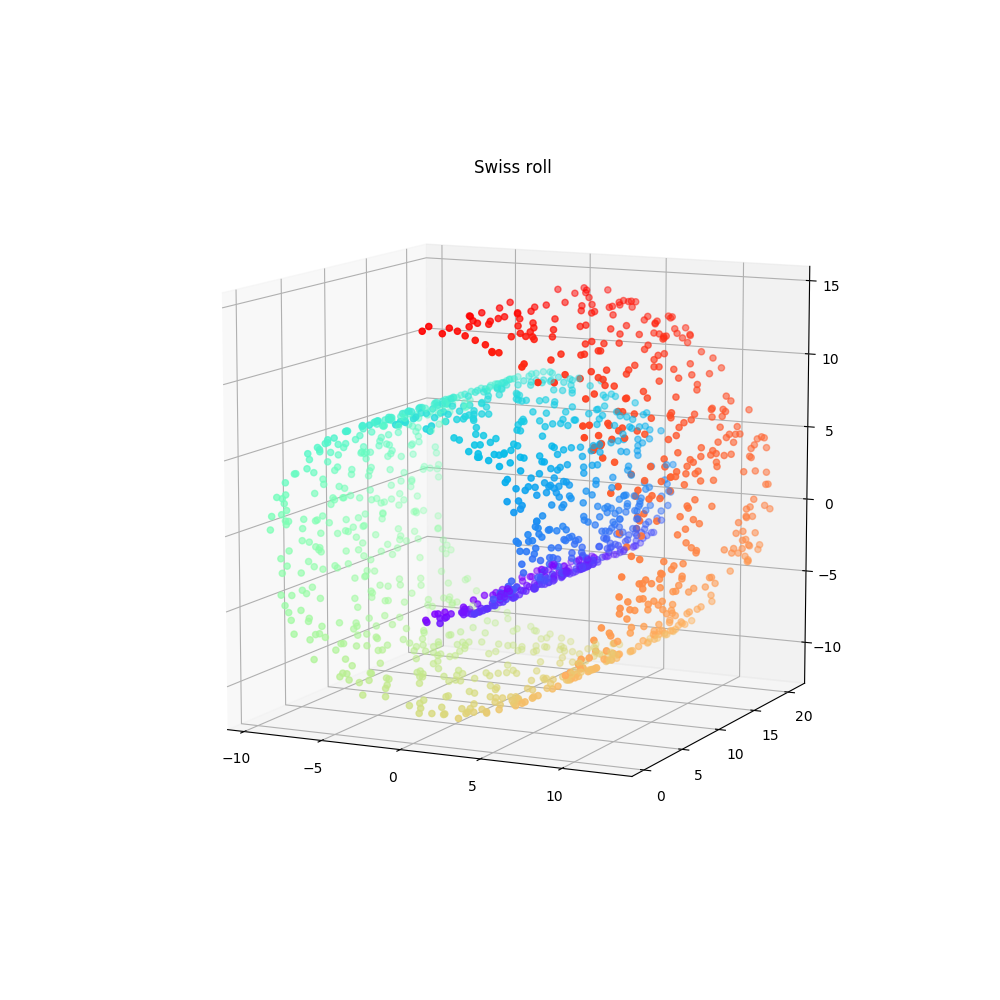

In [7]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets.samples_generator import make_swiss_roll

X, y = make_swiss_roll(n_samples=1500, random_state=42)
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1,1,1, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap=plt.cm.rainbow)
plt.title('Swiss roll')
plt.show()


<IPython.core.display.Javascript object>


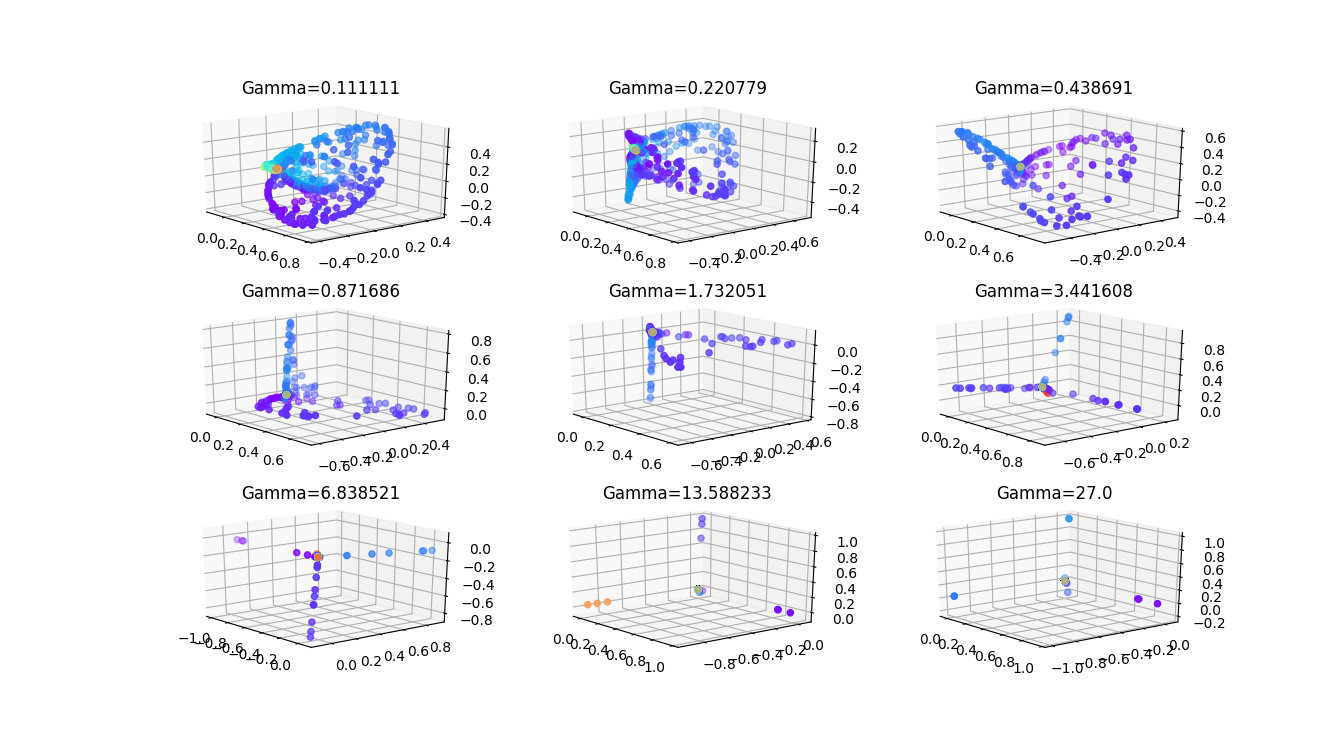

In [8]:


plt.rcParams['figure.figsize'] = [5, 5]


def plot3d(X, ax, gamma=''):
    ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap=plt.cm.rainbow)
    plt.title('Gamma=%s' % round(gamma, 6))


fig = plt.figure(figsize=plt.figaspect(0.5))
gammas = np.logspace(-2, 3, 9, base=3)
for n, axes in enumerate(gammas):
    ax = fig.add_subplot(3, 3, n+1, projection='3d', azim=-39, elev=21)
    gamma = gammas[n]
    transformed = kernel_pca(X, kernel='rbf', gamma=gamma, n=3)
    plot3d(transformed, ax, gamma=gamma)


plt.show()

<IPython.core.display.Javascript object>


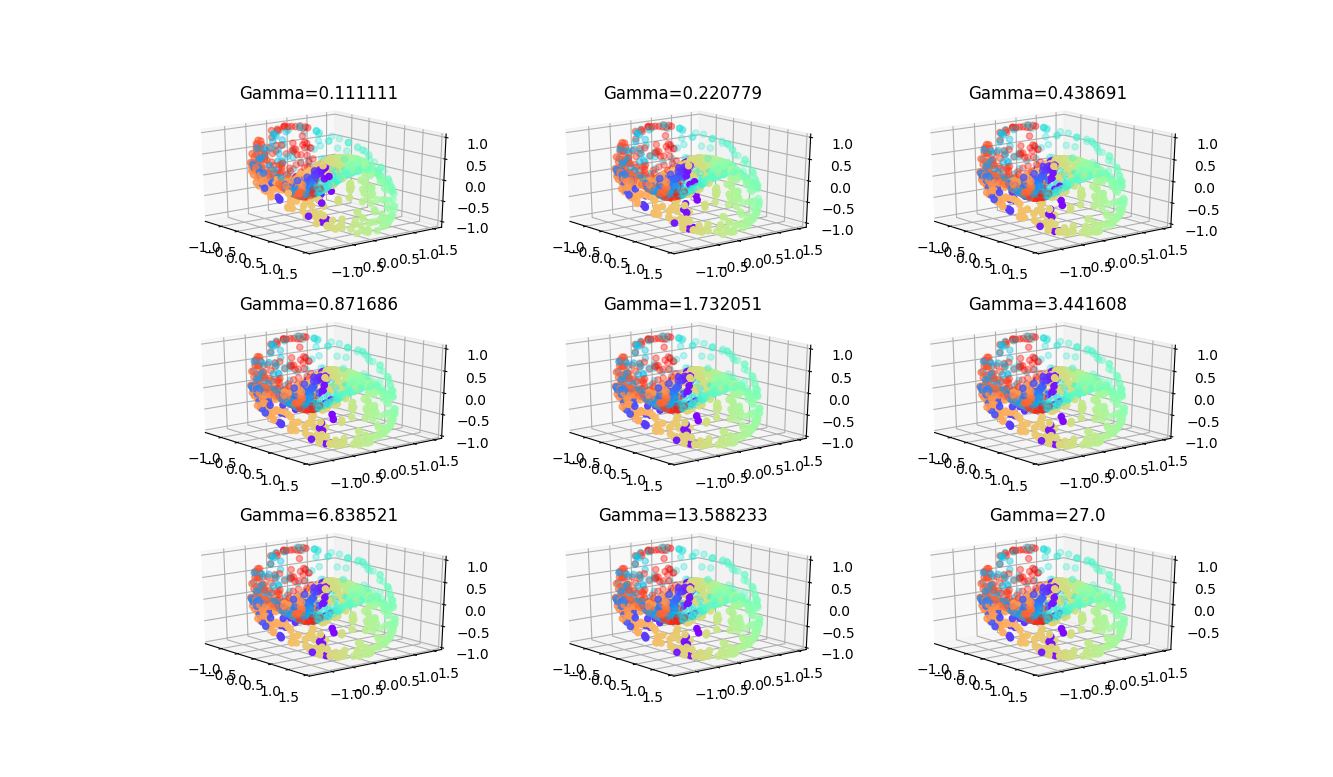

In [9]:
fig = plt.figure(figsize=plt.figaspect(0.5))
gammas = np.logspace(-2, 3, 9, base=3)
for n, axes in enumerate(gammas):
    ax = fig.add_subplot(3, 3, n+1, projection='3d', azim=-39, elev=21)
    gamma = gammas[n]
    transformed = kernel_pca(X, kernel='sigmoid', gamma=gamma, n=3)
    plot3d(transformed, ax, gamma=gamma)


plt.show()